In [4]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_sa = gpd.read_file('AOIs/saudi_arabia.geojson')
df_sa.head()

,name,code,group,geometry
0,Saudi Arabia,KSA,Countries,"POLYGON ((42.77933 16.34789, 42.64957 16.77463..."


In [3]:
df_y = gpd.read_file('AOIs/yemen.geojson')
df_y.head()

,name,code,group,geometry
0,Yemen,YEM,Countries,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."


In [6]:
df = pd.concat([df_sa, df_y], axis=0).dissolve()
df.head()

,geometry,name,code,group
0,"POLYGON ((52.38521 16.38241, 52.19173 15.93843...",Saudi Arabia,KSA,Countries


In [7]:
xmin, _, xmax, _ = df.total_bounds

In [18]:
bbox = box(xmin - 1, 0, xmax, 28)
df_subset = df.copy()
df_subset.geometry = df_subset.geometry.intersection(bbox)

<Axes: >

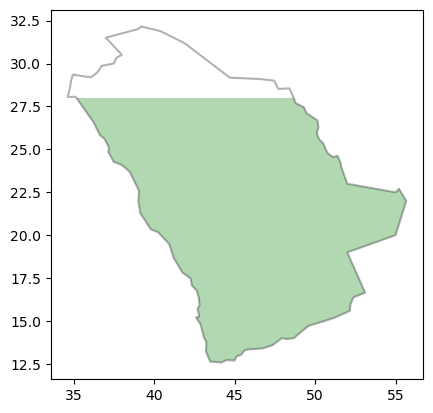

In [19]:
fig, ax = plt.subplots()
df.exterior.plot(ax=ax, alpha=.3, color='black')
df_subset.plot(ax=ax, alpha=.3, color='green')

In [22]:
df_subset.to_file('AOIs/arabian_subset_south.geojson', driver='GeoJSON')